# Part II - Findings from Ford GoBike System
## by Mark Lam

## Investigation Overview

In this investigation, I'd like to see how long the average trip takes. How weekdays and weekends riding activities would differ. And finally the top 10 starting and ending spots during weekdays and weekends respectively.


## Dataset Overview

There are 183,412 bike trips in the dataset with 16 columns of information about each trip such as duration, start and end time, station information and user information. I have also added new columns like duration_min (in minutes), age of users, distance calculated by coordinates, start_hour from start_time, start day and weekend. Most variables regarding the trips are numeric in nature, but there are also variables about the riders.

In [1]:
!pip install folium

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import folium

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
# to get a new column of duration in minutes
df['duration_min'] = (df['duration_sec']/60).round(2)

# to change the data type of start_time to datetime
df['start_time'] = pd.to_datetime(df['start_time'])

# to change the data type of end_time to datetime
df['end_time'] = pd.to_datetime(df['end_time'])

# to add a new column - start day of the trip
df['start_day'] = df['start_time'].dt.day_name()

# to add a new column - end day of the trip
df['end_day'] = df['end_time'].dt.day_name()

# to add a new column - age of users
df['age'] = 2019 - df['member_birth_year']

# To get the start time in hour
df['start_hour'] = df['start_time'].apply(lambda x: x.hour)

df['weekday/weekend'] = df.apply(lambda x: 'weekday' if x['start_day'] in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'weekend', axis = 1)

In [5]:
# to get a dataframe contains only information we are interested
stops = df[['start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude', 'end_station_longitude','start_day']]

# to get a dataframe that contains only information about weekdays
stops_weekday = stops.query('start_day != "Saturday" and start_day != "Sunday"')

# to get the top 10 starting spots on weekday
index_start_weekday = stops_weekday['start_station_id'].value_counts().index[:10]

top_start_weekday = stops_weekday[stops_weekday['start_station_id'].isin(index_start_weekday)]

# to drop the duplicates as we only need the coordinates of the station spots
top_start_weekday = top_start_weekday.drop_duplicates(subset = ['start_station_id'])

# to get the top 10 ending spots on weekday
index_end_weekday = stops_weekday['end_station_id'].value_counts().index[:10]

top_end_weekday = stops_weekday[stops_weekday['end_station_id'].isin(index_end_weekday)]

# to drop the duplicates as we only need the coordinates of the station spots
top_end_weekday = top_end_weekday.drop_duplicates(subset = ['end_station_id'])

# to get a dataframe that contains only information about weekend
stops_weekend = stops.query('start_day == "Saturday" or start_day == "Sunday"')

# to get the top 10 starting spots on weekend
index_start_weekend = stops_weekend['start_station_id'].value_counts().index[:10]

top_start_weekend = stops_weekend[stops_weekend['start_station_id'].isin(index_start_weekend)]

# to drop the duplicates as we only need the coordinates of the station spots
top_start_weekend = top_start_weekend.drop_duplicates(subset = ['start_station_id'])

# to get the top 10 ending spots on weekend
index_end_weekend = stops_weekend['end_station_id'].value_counts().index[:10]

top_end_weekend = stops_weekend[stops_weekend['end_station_id'].isin(index_end_weekend)]

# to drop the duplicates as we only need the coordinates of the station spots
top_end_weekend = top_end_weekend.drop_duplicates(subset = ['end_station_id'])

## Distribution of Trip Duration

The duration from the dataset take on a large range of values, from 1 minute to 1424 minutes. Plotting on a logarithmic scale, the distribution of duration takes on a unimodal shape, with one peak between 5 to 15 minutes.

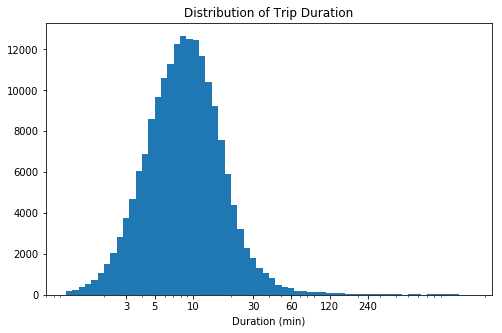

In [6]:
log_binsize = 0.05
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Duration')
plt.xscale('log')
plt.xticks([3, 5, 10, 30, 60, 120, 240], [3, 5, 10, 30, 60, 120, 240])
plt.xlabel('Duration (min)')
plt.show()

## Distribution of Start Hour on Weekdays and Weekends

For weekdays, let's say the busy hours are 6am to 8am and 4pm to 7pm. There are two peaks during these two periods. But for weekend, the busy hours only start from 10am until 6pm. There is only one peak, with much less activity throughout the day compared with weekdays.

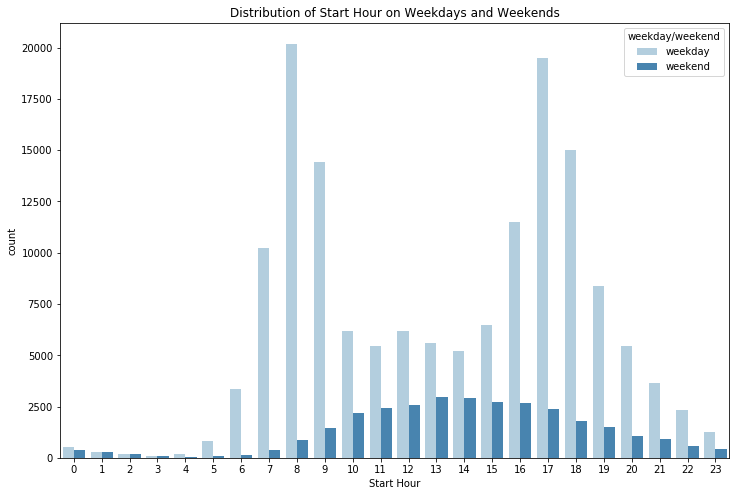

In [7]:
plt.figure(figsize = [12, 8])

sb.countplot(data = df, x = 'start_hour', hue = 'weekday/weekend', palette = 'Blues')
plt.title('Distribution of Start Hour on Weekdays and Weekends')
plt.xlabel('Start Hour');

## Distribution of Top 10 Starting and Ending Spots on Weekdays

During the weekdays, the top 10 spots would be centred around the San Francisco downton. There are some overlapping spots when we consider the top 10 starting and ending spots.

In [8]:
# to create a map for weekday top spots
sfmap_weekday = folium.Map(location = [top_start_weekday['start_station_latitude'].mean(), top_start_weekday['start_station_longitude'].mean()], zoom_start = 12, control_scale = True)

# to mark the top 10 starting spots on weekdays
for i, v in top_start_weekday.iterrows():
    folium.Marker(location = [v['start_station_latitude'], v['start_station_longitude']]).add_to(sfmap_weekday)
    
# to mark the top 10 ending spots on weekdays
for i, v in top_end_weekday.iterrows():
    folium.Marker(location = [v['end_station_latitude'], v['end_station_longitude']]).add_to(sfmap_weekday)
    
# this is the top 10 starting and top 10 ending bike trip spots on weekdays.
sfmap_weekday

## Distribution of Top 10 Starting and Ending Spots on Weekends
The top 10 starting and ending spots are slightly more spreaded for weekends than weekdays. Again there are some overlapping spots when we consider the top 10 starting and ending spots.

In [9]:
# to create a map for weekend top spots
sfmap_weekend = folium.Map(location = [top_start_weekend['start_station_latitude'].mean(), top_start_weekend['start_station_longitude'].mean()], zoom_start = 12, control_scale = True)

# to mark the top 10 starting spots on weekends
for i, v in top_start_weekend.iterrows():
    folium.Marker(location = [v['start_station_latitude'], v['start_station_longitude']]).add_to(sfmap_weekend)
    
# to mark the top 10 ending spots on weekends
for i, v in top_end_weekend.iterrows():
    folium.Marker(location = [v['end_station_latitude'], v['end_station_longitude']]).add_to(sfmap_weekend)
    
# this is the top 10 starting and top 10 ending bike trip spots on weekends.
sfmap_weekend

In [10]:
!jupyter nbconvert Part_II_Findings_from_Ford_GoBike_System.ipynb --to slides --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_Findings_from_Ford_GoBike_System.ipynb to slides
[NbConvertApp] Writing 336481 bytes to Part_II_Findings_from_Ford_GoBike_System.slides.html


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
